# Little Women  Book Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

## Word_embedding

Word embedding, bir kelime veya ifade için düz bir vektör olarak ifade edilmesidir. Bu vektörler, kelimelerin anlamları arasındaki benzerlikleri yansıtmak üzere öğrenilir. Bu sayede, yapay zeka modelleri kelimeler arasındaki ilişkileri daha iyi anlayabilir

Word embedding, metin verileri kullanılarak öğrenilir. Örneğin, bir metin corpus'u (büyük metin veritabanı) kullanılarak, her kelime için çevresindeki kelimeler ile ilişkisini öğrenir. Bu ilişki, kelime ve çevresindeki kelimeler arasındaki co-occurrence (ortak görünüm) frekansı olarak tanımlanır. Daha sonra, bu co-occurrence verileri kullanarak, her kelime için bir vektör oluşturulur. Bu vektörler, kelimelerin anlamları arasındaki benzerlikleri yansıtmak üzere tasarlanır.

Örneğin, "king" ve "queen" kelimeleri sıklıkla aynı metinlerde görülür ve benzer anlamlar taşır, bu nedenle oluşan vektörleri birbirine yakın olacak. Ancak "king" ve "orange" kelimeleri sıklıkla aynı metinlerde görülmez ve farklı anlamlar taşır, bu nedenle oluşan vektörleri birbirinden uzak olacak.

## we will learn about our book

In [4]:
df = pd.read_csv('37106.zip', sep='\t',
                  lineterminator='\r',
                  error_bad_lines=False,names = ["sentence"])
df

,sentence
0,"The Project Gutenberg EBook of Little Women, b..."
1,\n
2,\nThis eBook is for the use of anyone anywhere...
3,\nalmost no restrictions whatsoever. You may ...
4,\nre-use it under the terms of the Project Gut...
...,...
22865,\n
22866,\nThis Web site includes information about Pro...
22867,\nincluding how to make donations to the Proje...
22868,"\nArchive Foundation, how to help produce our ..."


In [14]:
df.shape

(22870, 1)

In [5]:
df.sentence[15]

'\nRelease Date: August 16, 2011 [EBook #37106]'

In [15]:
df.isnull().sum()

sentence    0
dtype: int64

In [16]:
df.nunique()

sentence    17711
dtype: int64

In [17]:
df.duplicated().sum()

5159

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



In [7]:
stop_words = stopwords.words('english')

In [8]:
def cleaning(data):
    
    #1. Tokenize and lower
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #5. joining
    return " ".join(text_cleaned)


In [7]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
       
    #9. joining
    return " ".join( text_cleaned)

In [19]:
df2 = df.copy()

In [20]:
df2["sentence"] = df["sentence"].apply(cleaning)
df2["sentence"].head()

0    project gutenberg ebook little woman louisa al...
1                                                     
2                       ebook use anyone anywhere cost
3     almost restriction whatsoever may copy give away
4              term project gutenberg license included
Name: sentence, dtype: object

In [21]:
df2.sentence[1]

''

In [22]:
" ".join(df2["sentence"]).split()

['project',
 'gutenberg',
 'ebook',
 'little',
 'woman',
 'louisa',
 'alcott',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'term',
 'project',
 'gutenberg',
 'license',
 'included',
 'ebook',
 'online',
 'title',
 'little',
 'woman',
 'meg',
 'jo',
 'beth',
 'amy',
 'author',
 'louisa',
 'alcott',
 'illustrator',
 'frank',
 'merrill',
 'release',
 'date',
 'august',
 'ebook',
 'last',
 'update',
 'august',
 'language',
 'english',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'little',
 'woman',
 'produced',
 'david',
 'edward',
 'ernest',
 'schaal',
 'robert',
 'homa',
 'online',
 'distributed',
 'proofreading',
 'team',
 'http',
 'file',
 'produced',
 'image',
 'generously',
 'made',
 'available',
 'internet',
 'archive',
 'illustration',
 'little',
 'woman',
 'meg',
 'jo',
 'beth',
 'amy',
 'louisa',
 'alcott',
 'little',
 'woman',
 'illustration',
 'drew',
 'fire',
 'mother',
 'big',
 'chair',
 'b

In [23]:
rare_words = pd.Series(" ".join(df2["sentence"]).split()).value_counts()
rare_words

jo              1414
one              939
said             841
little           770
meg              704
                ... 
carelessness       1
threaten           1
ubiquitous         1
chattering         1
newsletter         1
Length: 9359, dtype: int64

In [24]:
rare_words = rare_words[rare_words <= 2]

In [25]:
rare_words

drill           2
principal       2
philter         2
gummidge        2
apparition      2
               ..
carelessness    1
threaten        1
ubiquitous      1
chattering      1
newsletter      1
Length: 5128, dtype: int64

In [26]:
rare_words.index

Index(['drill', 'principal', 'philter', 'gummidge', 'apparition', 'level',
       'piety', 'giggle', 'tuesday', 'patronized',
       ...
       'ironed', 'washed', 'stiffness', 'martha', 'cumbered', 'carelessness',
       'threaten', 'ubiquitous', 'chattering', 'newsletter'],
      dtype='object', length=5128)

In [17]:
df2["sentence"] = df2["sentence"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["sentence"].head()

0    project gutenberg ebook little woman louisa al...
1                                                     
2                       ebook use anyone anywhere cost
3                            almost may copy give away
4              term project gutenberg license included
Name: sentence, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


In [ ]:
#https://python-course.eu/applications-python/python-wordcloud-tutorial.php

### Create Word Cloud 

In [27]:
from wordcloud import WordCloud

In [28]:
wordcloud_words = WordCloud(background_color="white", max_words =100)

<function matplotlib.pyplot.show(close=None, block=None)>

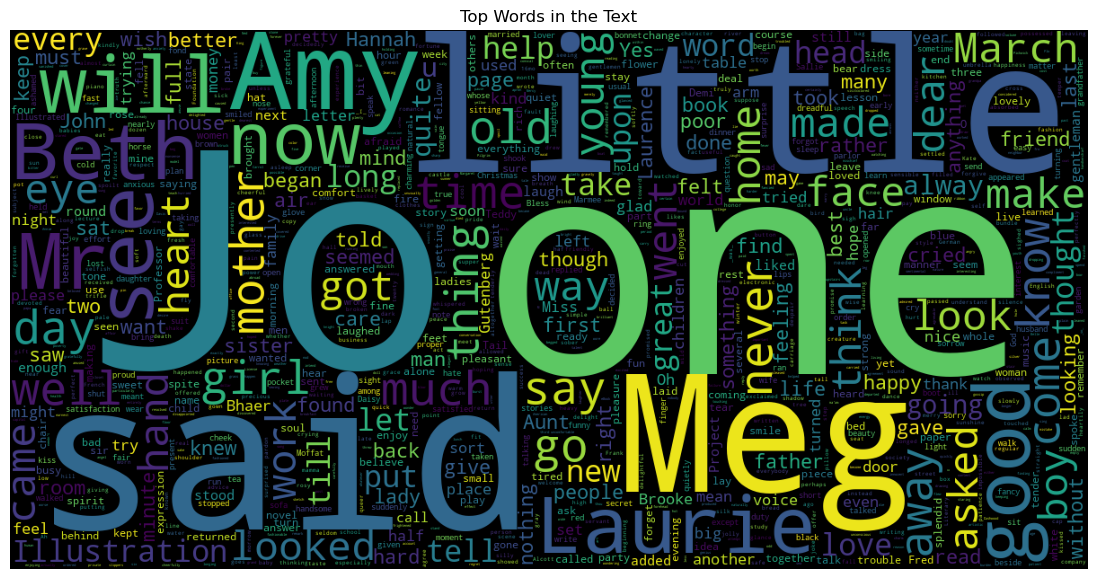

In [29]:
wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)
wc.generate(" ".join(df["sentence"].values))

plt.figure(figsize = [15, 7])
plt.title("Top Words in the Text")
plt.imshow(wc)
plt.axis("off")
plt.show

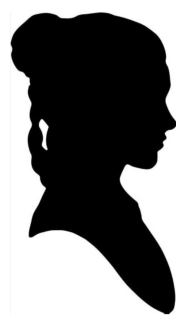

In [34]:
from PIL import Image

women_mask = np.array(Image.open("little_women.jpeg"))
#dove_mask[230:250, 240:250]
plt.imshow(women_mask)
plt.axis("off")
plt.show()

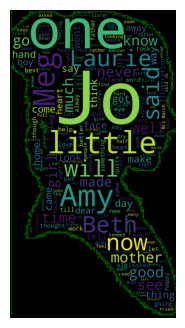

In [35]:
wordcloud = WordCloud(background_color="black", 
                      mask=women_mask,
                      contour_width=3, 
                      repeat=True,
                      min_font_size=3,
                      contour_color='darkgreen')

# Generate a wordcloud
wordcloud.generate(" ".join(df["sentence"].values))

# store to file
wordcloud.to_file("little_women.jpeg")

# show

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
from PIL import Image

women_mask = np.array(Image.open("son.jpg"))
#dove_mask[230:250, 240:250]
plt.imshow(women_mask)
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'son.jpg'

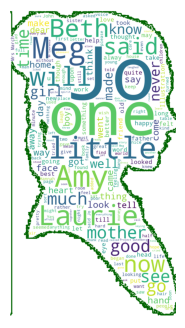

In [36]:
wordcloud = WordCloud(background_color="white", 
                      mask=women_mask,
                      contour_width=5, 
                      repeat=True,
                      min_font_size=1,
                      contour_color='darkgreen')

# Generate a wordcloud
wordcloud.generate(" ".join(df["sentence"].values))

# store to file
wordcloud.to_file("little_women.jpeg")

# show

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

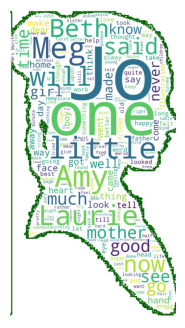

In [37]:
from PIL import Image

women_mask = np.array(Image.open("little_women.jpeg"))
#dove_mask[230:250, 240:250]
plt.imshow(women_mask)
plt.axis("off")
plt.show()

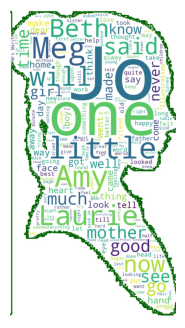

In [38]:
women_img = Image.fromarray(wordcloud.to_array())
women_mask_img = Image.fromarray(women_mask)

new_img = Image.blend(women_img, 
                      women_mask_img, 
                      0.5)
new_img.save("büşş.jpn","PNG")
plt.imshow(new_img)
plt.axis("off")
plt.show()

ValueError: WordCloud has not been calculated, call generate first.

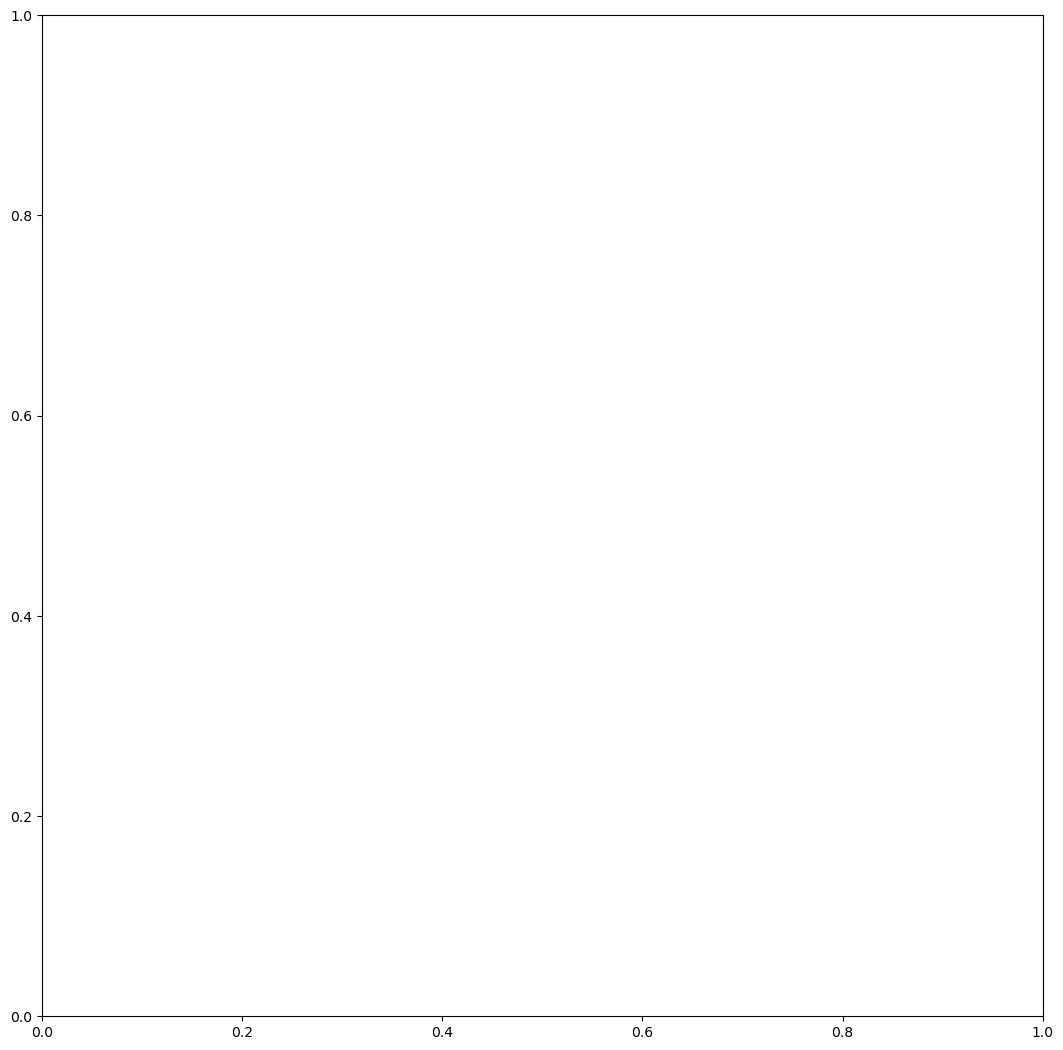

In [22]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_words, interpolation="bilinear",)
plt.axis("off")
plt.show()

In [29]:
word_tokenize(df.sentence[15])
#bütün kelimeleri birer token haline getiriyor

['release', 'date', 'august', 'ebook']

In [36]:
corpus = []
for i in df.sentence:
    corpus.append(word_tokenize(i))
print(corpus[:100])

# word2vec algoritması tüm corpusun 2 boyutlu olmasını ister. Bu sebeple burdaki for döngüsü ile tüm documnetleri/satırları
# teker teker çekip word tokenlerine ayırıyoruz. Word_tokenize fonksiyonu default olarak texti word tokenlerine ayırıp bir 
# listeye atar. Bu listeler corpus listesine append edilerek corpus 2 boyutlu hale getiritir. 

[['project', 'gutenberg', 'ebook', 'little', 'woman', 'louisa', 'alcott'], [], ['ebook', 'use', 'anyone', 'anywhere', 'no', 'cost'], ['almost', 'no', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away'], ['term', 'project', 'gutenberg', 'license', 'included'], ['ebook', 'online'], [], [], ['title', 'little', 'woman'], ['meg', 'jo', 'beth', 'amy'], [], ['author', 'louisa', 'alcott'], [], ['illustrator', 'frank', 'merrill'], [], ['release', 'date', 'august', 'ebook'], ['last', 'update', 'august'], [], ['language', 'english'], [], [], ['start', 'project', 'gutenberg', 'ebook', 'little', 'woman'], [], [], [], [], ['produced', 'david', 'edward', 'ernest', 'schaal', 'robert', 'homa'], ['online', 'distributed', 'proofreading', 'team'], ['file', 'produced', 'image', 'generously', 'made', 'available'], ['internet', 'archive'], [], [], [], [], [], [], [], [], [], ['illustration', 'little', 'woman'], ['meg', 'jo', 'beth', 'amy'], ['louisa', 'alcott'], [], [], [], [], ['little', 'woman'], [

In [31]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)


In [33]:
model.wv['amy']

array([-0.10923159,  0.13072467,  0.03761384,  0.08717307, -0.03792731,
       -0.23263079,  0.16532098,  0.26308402, -0.18445441, -0.16684566,
       -0.07355784, -0.21889633,  0.006088  ,  0.01364326,  0.05760694,
       -0.21574578,  0.12933673, -0.2872026 , -0.11532544, -0.37491813,
        0.10304199,  0.02878443,  0.12362453, -0.0251063 , -0.09413058,
       -0.04234261, -0.12902471, -0.03398278, -0.14790621,  0.01293972,
        0.12294166,  0.04743562,  0.00379382, -0.23672926,  0.02634928,
        0.08852148,  0.04197003, -0.138138  , -0.11905968, -0.43067837,
       -0.00852977, -0.13099797, -0.16392985,  0.11587094,  0.17266603,
       -0.15167056, -0.14590687,  0.0330584 ,  0.07201734,  0.09236277,
        0.00597316, -0.15295559,  0.01072504, -0.01339628, -0.03797968,
        0.05165851,  0.09022664,  0.02552943, -0.23545365,  0.12458847,
        0.10984664,  0.0053938 , -0.02791076, -0.0135391 , -0.2677591 ,
        0.15718623,  0.07207749,  0.22412273, -0.20492959,  0.20

In [34]:
model.wv.most_similar('amy')
# hangi tokenlerle anlamsal ilşki kurdu( topn) default 10 olduğu için 10 tanesini yazdırdı..
#aynı text içinde sıklıkla birlikte kullanılan kelimeleri getiriyor.

[('beth', 0.9927499890327454),
 ('meg', 0.9925611019134521),
 ('jo', 0.9916201829910278),
 ('laurie', 0.9884529113769531),
 ('spoke', 0.9841747879981995),
 ('saw', 0.9822825193405151),
 ('looking', 0.9813973903656006),
 ('back', 0.9813187122344971),
 ('laughed', 0.9809998869895935),
 ('tone', 0.9808567762374878)]

In [35]:
model.wv.most_similar('laughed')

[('spoke', 0.9971317648887634),
 ('smiling', 0.9965564012527466),
 ('smiled', 0.9965027570724487),
 ('turning', 0.9958611726760864),
 ('threw', 0.9957404732704163),
 ('leaned', 0.9956763982772827),
 ('walked', 0.9956645965576172),
 ('drew', 0.9956222176551819),
 ('gently', 0.9954844117164612),
 ('saw', 0.9954180717468262)]

In [ ]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=5)